In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt


In [33]:
data_full=pd.read_json('data/electronics_review100k.json',lines = True)

In [34]:
data_full.head()

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0528881469,"[0, 0]",5,We got this GPS for my husband who is an (OTR)...,"06 2, 2013",AO94DHGC771SJ,amazdnu,Gotta have GPS!,1370131200
1,0528881469,"[12, 15]",1,"I'm a professional OTR truck driver, and I bou...","11 25, 2010",AMO214LNFCEI4,Amazon Customer,Very Disappointed,1290643200
2,0528881469,"[43, 45]",3,"Well, what can I say. I've had this unit in m...","09 9, 2010",A3N7T0DY83Y4IG,C. A. Freeman,1st impression,1283990400
3,0528881469,"[9, 10]",2,"Not going to write a long review, even thought...","11 24, 2010",A1H8PY3QHMQQA0,"Dave M. Shaw ""mack dave""","Great grafics, POOR GPS",1290556800
4,0528881469,"[0, 0]",1,I've had mine for a year and here's what we go...,"09 29, 2011",A24EV6RXELQZ63,Wayne Smith,"Major issues, only excuses for support",1317254400


In [35]:
data=data_full[['reviewText', 'overall']]

In [36]:
data.head()

,reviewText,overall
0,We got this GPS for my husband who is an (OTR)...,5
1,"I'm a professional OTR truck driver, and I bou...",1
2,"Well, what can I say. I've had this unit in m...",3
3,"Not going to write a long review, even thought...",2
4,I've had mine for a year and here's what we go...,1


In [37]:
ser_rating=data['overall']

In [38]:
data.describe()

,overall
count,100000.000000
mean,4.231190
std,1.187011
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [39]:
data=data.replace([1,2,3,4,5],['Negative','Negative','Neutral','Positive','Positive'])

In [40]:
data.head()

,reviewText,overall
0,We got this GPS for my husband who is an (OTR)...,Positive
1,"I'm a professional OTR truck driver, and I bou...",Negative
2,"Well, what can I say. I've had this unit in m...",Neutral
3,"Not going to write a long review, even thought...",Negative
4,I've had mine for a year and here's what we go...,Negative


In [41]:
data['Ratings']=ser_rating

In [42]:
data.head()

,reviewText,overall,Ratings
0,We got this GPS for my husband who is an (OTR)...,Positive,5
1,"I'm a professional OTR truck driver, and I bou...",Negative,1
2,"Well, what can I say. I've had this unit in m...",Neutral,3
3,"Not going to write a long review, even thought...",Negative,2
4,I've had mine for a year and here's what we go...,Negative,1


In [43]:
data=data.rename({'overall':'Sentiment'},axis=1)
data.head()

,reviewText,Sentiment,Ratings
0,We got this GPS for my husband who is an (OTR)...,Positive,5
1,"I'm a professional OTR truck driver, and I bou...",Negative,1
2,"Well, what can I say. I've had this unit in m...",Neutral,3
3,"Not going to write a long review, even thought...",Negative,2
4,I've had mine for a year and here's what we go...,Negative,1


In [44]:
data.groupby('Sentiment').count()
#Dataset is unbalanced

,reviewText,Ratings
Sentiment,,
Negative,11326,11326
Neutral,7982,7982
Positive,80692,80692


In [77]:
#Seeing positive comments
#pd.set_option('display.max_colwidth', -1)
mask=data['Sentiment']=='Positive'
p_comments=data[mask]['reviewText']
p_comments[:5]

0    We got this GPS for my husband who is an (OTR)...
5    I am using this with a Nook HD+. It works as d...
7    This adaptor is real easy to setup and use rig...
8    This adapter easily connects my Nook HD 7&#34;...
9    This product really works great but I found th...
Name: reviewText, dtype: object

In [79]:
#Seeing Negative comments
mask=data['Sentiment']=='Negative'
N_comments=data[mask]['reviewText']
N_comments[:5]

1     I'm a professional OTR truck driver, and I bou...
3     Not going to write a long review, even thought...
4     I've had mine for a year and here's what we go...
6     The cable is very wobbly and sometimes disconn...
68    The mount plate and the extender arms need to ...
Name: reviewText, dtype: object

In [81]:
mask=data['Sentiment']=='Neutral'
Neu_comments=data[mask]['reviewText']
Neu_comments[:5]

2     Well, what can I say.  I've had this unit in m...
13    This is a good beefy 2 amp charger, but it cov...
15    It does 2A and charges a DEAD Nook in a few ho...
16    Go to Target or Barnes and Noble instead, and ...
43    For the price, you can't beat it. Mine didn't ...
Name: reviewText, dtype: object

In [48]:
documents=data['reviewText']
y_target=data['Sentiment']

In [49]:
X_train,X_test,y_train,y_test=train_test_split(documents,y_target,test_size=0.20,random_state=0,shuffle=True,stratify=y_target)

In [50]:
y_test.value_counts()

Positive    16139
Negative     2265
Neutral      1596
Name: Sentiment, dtype: int64

In [67]:
model_NB=Pipeline([('vect',TfidfVectorizer()),
               ('clf',MultinomialNB())])
model_DT=Pipeline([('vect',TfidfVectorizer()),
                ('tcl',DecisionTreeClassifier())])
model_GB=Pipeline([('vect',TfidfVectorizer()),
                ('gbcl',GradientBoostingClassifier())])
model_LR=Pipeline([('vect',TfidfVectorizer()),
                ('lrcl',LogisticRegression())])
model_RF=Pipeline([('vect',TfidfVectorizer()),
                ('rfcl',RandomForestClassifier())])

In [52]:
models=[model_NB,model_DT,model_RF,model_GB,model_LR]
for model in models:
    model.fit(X_train,y_train)
    predict=model.predict(X_test)
    print('For model'+ str(model)+ 'Accuracy achieved is'+str(accuracy_score(y_test,predict)))
    print('Classification report:'+ str(metrics.classification_report(y_test,predict)))

For modelPipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
...rue,
        vocabulary=None)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])Accuracy achieved is0.80685


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Classification report:              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00      2265
     Neutral       0.00      0.00      0.00      1596
    Positive       0.81      1.00      0.89     16139

   micro avg       0.81      0.81      0.81     20000
   macro avg       0.27      0.33      0.30     20000
weighted avg       0.65      0.81      0.72     20000

For modelPipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
...      min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))])Accuracy achieved is0.75245
Classification report:              precision    recall  f1-score   support

    Negative       0.36      0.35      0.35      226

/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


For modelPipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
...penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])Accuracy achieved is0.8548
Classification report:              precision    recall  f1-score   support

    Negative       0.73      0.50      0.60      2265
     Neutral       0.41      0.04      0.08      1596
    Positive       0.87      0.98      0.92     16139

   micro avg       0.85      0.85      0.85     20000
   macro avg       0.67      0.51      0.53     20000
weighted avg       0.82      0.85      0.82     20000

For modelPipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        

In [21]:
sentiments=['Positive','Negative','Neutral']
avg_comment_len=[]
for sentiment in sentiments:
    mask=data['Sentiment']==sentiment
    comments=data[mask]['reviewText']

    comment_len=[]
    for comment in comments:
        comment_len.append(len(comment))
    avg_comment_len.append(np.median(comment_len))
avg_comment_len=np.round(avg_comment_len,0)

Text(0.5, 1.0, 'Comparison of the Median Length of the Comments for Different Sentiments')

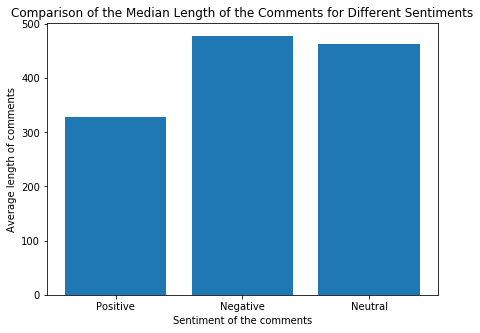

In [22]:
fig, ax= plt.subplots(figsize=(7,5))
ax.bar(sentiments,avg_comment_len)
ax.set_ylabel('Average length of comments')
ax.set_xlabel('Sentiment of the comments')
ax.set_title('Comparison of the Median Length of the Comments for Different Sentiments')

In [ ]:
# for binary classification
def compute_roc(y_true, y_pred, plot=True):
    """
    TODO
    :param y_true: ground truth
    :param y_pred: predictions
    :param plot:
    :return:
    """
    fpr, tpr, _ = metrics.roc_curve(y_true, y_pred)
    auc_score = auc(fpr, tpr)
    if plot:
        plt.figure(figsize=(7, 6))
        plt.plot(fpr, tpr, color='blue',
                 label='ROC (AUC = %0.4f)' % auc_score)
        plt.legend(loc='lower right')
        plt.title("ROC Curve")
        plt.xlabel("FPR")
        plt.ylabel("TPR")
        plt.show()
    #return fpr, tpr, auc_score 

model_NB.fit(X_train,y_train)
y_pred=model.predict(X_test)
compute_roc(y_test, y_pred)

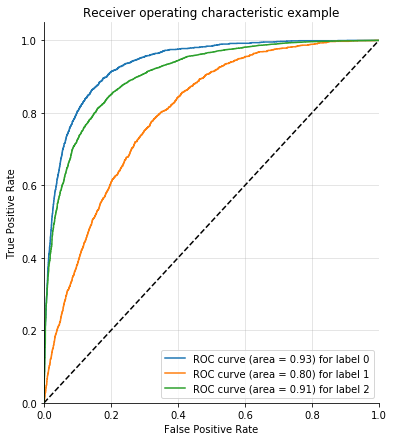

In [53]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import seaborn as sns

def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(17, 6)):
    y_score = clf.decision_function(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()


#model_RF.fit(X_train,y_train)
#y_test=model_RF.predict(X_test)
plot_multiclass_roc(model_RF, X_test, y_test, n_classes=3, figsize=(6,7))

In [179]:
# Grit Search for RF
model_RF=Pipeline([('vect',TfidfVectorizer()),
                ('rfcl',RandomForestClassifier())])
parameters = {
    'rfcl__max_features': ['auto',20000], 
    'rfcl__min_samples_leaf':[10,50],
    'rfcl__min_samples_split':[100,200,300,500,1000],
    'rfcl__max_depth':[10,50,100,200,300,500]
}
grid_search_tune = GridSearchCV(model_RF, parameters, cv=2,verbose=3)
grid_search_tune.fit(X_train, y_train)

print("Best parameters set:")
print(grid_search_tune.best_estimator_.steps)

Fitting 2 folds for each of 120 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] rfcl__max_depth=10, rfcl__max_features=auto, rfcl__min_samples_leaf=10, rfcl__min_samples_split=100 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=10, rfcl__max_features=auto, rfcl__min_samples_leaf=10, rfcl__min_samples_split=100, score=0.8069048273793156, total=  19.4s
[CV] rfcl__max_depth=10, rfcl__max_features=auto, rfcl__min_samples_leaf=10, rfcl__min_samples_split=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   28.6s remaining:    0.0s
/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=10, rfcl__max_features=auto, rfcl__min_samples_leaf=10, rfcl__min_samples_split=100, score=0.8069201730043251, total=  18.9s
[CV] rfcl__max_depth=10, rfcl__max_features=auto, rfcl__min_samples_leaf=10, rfcl__min_samples_split=200 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   56.7s remaining:    0.0s
/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=10, rfcl__max_features=auto, rfcl__min_samples_leaf=10, rfcl__min_samples_split=200, score=0.8069048273793156, total=  17.1s
[CV] rfcl__max_depth=10, rfcl__max_features=auto, rfcl__min_samples_leaf=10, rfcl__min_samples_split=200 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=10, rfcl__max_features=auto, rfcl__min_samples_leaf=10, rfcl__min_samples_split=200, score=0.8069201730043251, total=  16.5s
[CV] rfcl__max_depth=10, rfcl__max_features=auto, rfcl__min_samples_leaf=10, rfcl__min_samples_split=300 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=10, rfcl__max_features=auto, rfcl__min_samples_leaf=10, rfcl__min_samples_split=300, score=0.8069048273793156, total=  15.8s
[CV] rfcl__max_depth=10, rfcl__max_features=auto, rfcl__min_samples_leaf=10, rfcl__min_samples_split=300 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=10, rfcl__max_features=auto, rfcl__min_samples_leaf=10, rfcl__min_samples_split=300, score=0.8069201730043251, total=  16.2s
[CV] rfcl__max_depth=10, rfcl__max_features=auto, rfcl__min_samples_leaf=10, rfcl__min_samples_split=500 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=10, rfcl__max_features=auto, rfcl__min_samples_leaf=10, rfcl__min_samples_split=500, score=0.8069048273793156, total=  16.7s
[CV] rfcl__max_depth=10, rfcl__max_features=auto, rfcl__min_samples_leaf=10, rfcl__min_samples_split=500 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=10, rfcl__max_features=auto, rfcl__min_samples_leaf=10, rfcl__min_samples_split=500, score=0.8069201730043251, total=  15.6s
[CV] rfcl__max_depth=10, rfcl__max_features=auto, rfcl__min_samples_leaf=10, rfcl__min_samples_split=1000 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=10, rfcl__max_features=auto, rfcl__min_samples_leaf=10, rfcl__min_samples_split=1000, score=0.8069048273793156, total=  15.8s
[CV] rfcl__max_depth=10, rfcl__max_features=auto, rfcl__min_samples_leaf=10, rfcl__min_samples_split=1000 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=10, rfcl__max_features=auto, rfcl__min_samples_leaf=10, rfcl__min_samples_split=1000, score=0.8069201730043251, total=  15.8s
[CV] rfcl__max_depth=10, rfcl__max_features=auto, rfcl__min_samples_leaf=50, rfcl__min_samples_split=100 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=10, rfcl__max_features=auto, rfcl__min_samples_leaf=50, rfcl__min_samples_split=100, score=0.8069048273793156, total=  15.2s
[CV] rfcl__max_depth=10, rfcl__max_features=auto, rfcl__min_samples_leaf=50, rfcl__min_samples_split=100 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=10, rfcl__max_features=auto, rfcl__min_samples_leaf=50, rfcl__min_samples_split=100, score=0.8069201730043251, total=  17.2s
[CV] rfcl__max_depth=10, rfcl__max_features=auto, rfcl__min_samples_leaf=50, rfcl__min_samples_split=200 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=10, rfcl__max_features=auto, rfcl__min_samples_leaf=50, rfcl__min_samples_split=200, score=0.8069048273793156, total=  22.7s
[CV] rfcl__max_depth=10, rfcl__max_features=auto, rfcl__min_samples_leaf=50, rfcl__min_samples_split=200 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=10, rfcl__max_features=auto, rfcl__min_samples_leaf=50, rfcl__min_samples_split=200, score=0.8069701742543564, total=  16.0s
[CV] rfcl__max_depth=10, rfcl__max_features=auto, rfcl__min_samples_leaf=50, rfcl__min_samples_split=300 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=10, rfcl__max_features=auto, rfcl__min_samples_leaf=50, rfcl__min_samples_split=300, score=0.8069048273793156, total=  16.6s
[CV] rfcl__max_depth=10, rfcl__max_features=auto, rfcl__min_samples_leaf=50, rfcl__min_samples_split=300 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=10, rfcl__max_features=auto, rfcl__min_samples_leaf=50, rfcl__min_samples_split=300, score=0.8069201730043251, total=  16.4s
[CV] rfcl__max_depth=10, rfcl__max_features=auto, rfcl__min_samples_leaf=50, rfcl__min_samples_split=500 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=10, rfcl__max_features=auto, rfcl__min_samples_leaf=50, rfcl__min_samples_split=500, score=0.8069048273793156, total=  15.6s
[CV] rfcl__max_depth=10, rfcl__max_features=auto, rfcl__min_samples_leaf=50, rfcl__min_samples_split=500 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=10, rfcl__max_features=auto, rfcl__min_samples_leaf=50, rfcl__min_samples_split=500, score=0.8069201730043251, total=  15.5s
[CV] rfcl__max_depth=10, rfcl__max_features=auto, rfcl__min_samples_leaf=50, rfcl__min_samples_split=1000 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=10, rfcl__max_features=auto, rfcl__min_samples_leaf=50, rfcl__min_samples_split=1000, score=0.8069048273793156, total=  16.3s
[CV] rfcl__max_depth=10, rfcl__max_features=auto, rfcl__min_samples_leaf=50, rfcl__min_samples_split=1000 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=10, rfcl__max_features=auto, rfcl__min_samples_leaf=50, rfcl__min_samples_split=1000, score=0.8069201730043251, total=  17.4s
[CV] rfcl__max_depth=10, rfcl__max_features=20000, rfcl__min_samples_leaf=10, rfcl__min_samples_split=100 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=10, rfcl__max_features=20000, rfcl__min_samples_leaf=10, rfcl__min_samples_split=100, score=0.8183045423864403, total=  35.6s
[CV] rfcl__max_depth=10, rfcl__max_features=20000, rfcl__min_samples_leaf=10, rfcl__min_samples_split=100 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=10, rfcl__max_features=20000, rfcl__min_samples_leaf=10, rfcl__min_samples_split=100, score=0.8176954423860596, total=  36.0s
[CV] rfcl__max_depth=10, rfcl__max_features=20000, rfcl__min_samples_leaf=10, rfcl__min_samples_split=200 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=10, rfcl__max_features=20000, rfcl__min_samples_leaf=10, rfcl__min_samples_split=200, score=0.8180545486362841, total=  34.8s
[CV] rfcl__max_depth=10, rfcl__max_features=20000, rfcl__min_samples_leaf=10, rfcl__min_samples_split=200 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=10, rfcl__max_features=20000, rfcl__min_samples_leaf=10, rfcl__min_samples_split=200, score=0.8169204230105752, total=  38.4s
[CV] rfcl__max_depth=10, rfcl__max_features=20000, rfcl__min_samples_leaf=10, rfcl__min_samples_split=300 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=10, rfcl__max_features=20000, rfcl__min_samples_leaf=10, rfcl__min_samples_split=300, score=0.8169545761355966, total=  34.7s
[CV] rfcl__max_depth=10, rfcl__max_features=20000, rfcl__min_samples_leaf=10, rfcl__min_samples_split=300 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=10, rfcl__max_features=20000, rfcl__min_samples_leaf=10, rfcl__min_samples_split=300, score=0.816070401760044, total=  35.9s
[CV] rfcl__max_depth=10, rfcl__max_features=20000, rfcl__min_samples_leaf=10, rfcl__min_samples_split=500 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=10, rfcl__max_features=20000, rfcl__min_samples_leaf=10, rfcl__min_samples_split=500, score=0.8162045948851279, total=  34.0s
[CV] rfcl__max_depth=10, rfcl__max_features=20000, rfcl__min_samples_leaf=10, rfcl__min_samples_split=500 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=10, rfcl__max_features=20000, rfcl__min_samples_leaf=10, rfcl__min_samples_split=500, score=0.8159203980099502, total=  34.8s
[CV] rfcl__max_depth=10, rfcl__max_features=20000, rfcl__min_samples_leaf=10, rfcl__min_samples_split=1000 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=10, rfcl__max_features=20000, rfcl__min_samples_leaf=10, rfcl__min_samples_split=1000, score=0.8155046123846904, total=  35.4s
[CV] rfcl__max_depth=10, rfcl__max_features=20000, rfcl__min_samples_leaf=10, rfcl__min_samples_split=1000 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=10, rfcl__max_features=20000, rfcl__min_samples_leaf=10, rfcl__min_samples_split=1000, score=0.8159203980099502, total=  34.5s
[CV] rfcl__max_depth=10, rfcl__max_features=20000, rfcl__min_samples_leaf=50, rfcl__min_samples_split=100 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=10, rfcl__max_features=20000, rfcl__min_samples_leaf=50, rfcl__min_samples_split=100, score=0.8170795730106747, total=  35.6s
[CV] rfcl__max_depth=10, rfcl__max_features=20000, rfcl__min_samples_leaf=50, rfcl__min_samples_split=100 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=10, rfcl__max_features=20000, rfcl__min_samples_leaf=50, rfcl__min_samples_split=100, score=0.8145953648841221, total=  38.0s
[CV] rfcl__max_depth=10, rfcl__max_features=20000, rfcl__min_samples_leaf=50, rfcl__min_samples_split=200 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=10, rfcl__max_features=20000, rfcl__min_samples_leaf=50, rfcl__min_samples_split=200, score=0.8157546061348466, total=  32.7s
[CV] rfcl__max_depth=10, rfcl__max_features=20000, rfcl__min_samples_leaf=50, rfcl__min_samples_split=200 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=10, rfcl__max_features=20000, rfcl__min_samples_leaf=50, rfcl__min_samples_split=200, score=0.8154203855096377, total=  36.0s
[CV] rfcl__max_depth=10, rfcl__max_features=20000, rfcl__min_samples_leaf=50, rfcl__min_samples_split=300 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=10, rfcl__max_features=20000, rfcl__min_samples_leaf=50, rfcl__min_samples_split=300, score=0.8166295842603934, total=  34.4s
[CV] rfcl__max_depth=10, rfcl__max_features=20000, rfcl__min_samples_leaf=50, rfcl__min_samples_split=300 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=10, rfcl__max_features=20000, rfcl__min_samples_leaf=50, rfcl__min_samples_split=300, score=0.8159953998849971, total=  33.9s
[CV] rfcl__max_depth=10, rfcl__max_features=20000, rfcl__min_samples_leaf=50, rfcl__min_samples_split=500 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=10, rfcl__max_features=20000, rfcl__min_samples_leaf=50, rfcl__min_samples_split=500, score=0.8154296142596436, total=  35.3s
[CV] rfcl__max_depth=10, rfcl__max_features=20000, rfcl__min_samples_leaf=50, rfcl__min_samples_split=500 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=10, rfcl__max_features=20000, rfcl__min_samples_leaf=50, rfcl__min_samples_split=500, score=0.8138203455086377, total=  35.6s
[CV] rfcl__max_depth=10, rfcl__max_features=20000, rfcl__min_samples_leaf=50, rfcl__min_samples_split=1000 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=10, rfcl__max_features=20000, rfcl__min_samples_leaf=50, rfcl__min_samples_split=1000, score=0.8164795880102997, total=  32.6s
[CV] rfcl__max_depth=10, rfcl__max_features=20000, rfcl__min_samples_leaf=50, rfcl__min_samples_split=1000 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=10, rfcl__max_features=20000, rfcl__min_samples_leaf=50, rfcl__min_samples_split=1000, score=0.8148203705092627, total=  31.5s
[CV] rfcl__max_depth=50, rfcl__max_features=auto, rfcl__min_samples_leaf=10, rfcl__min_samples_split=100 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=50, rfcl__max_features=auto, rfcl__min_samples_leaf=10, rfcl__min_samples_split=100, score=0.8070298242543936, total=  17.5s
[CV] rfcl__max_depth=50, rfcl__max_features=auto, rfcl__min_samples_leaf=10, rfcl__min_samples_split=100 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=50, rfcl__max_features=auto, rfcl__min_samples_leaf=10, rfcl__min_samples_split=100, score=0.8071201780044501, total=  17.9s
[CV] rfcl__max_depth=50, rfcl__max_features=auto, rfcl__min_samples_leaf=10, rfcl__min_samples_split=200 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=50, rfcl__max_features=auto, rfcl__min_samples_leaf=10, rfcl__min_samples_split=200, score=0.8070798230044249, total=  17.2s
[CV] rfcl__max_depth=50, rfcl__max_features=auto, rfcl__min_samples_leaf=10, rfcl__min_samples_split=200 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=50, rfcl__max_features=auto, rfcl__min_samples_leaf=10, rfcl__min_samples_split=200, score=0.8070701767544188, total=  16.6s
[CV] rfcl__max_depth=50, rfcl__max_features=auto, rfcl__min_samples_leaf=10, rfcl__min_samples_split=300 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=50, rfcl__max_features=auto, rfcl__min_samples_leaf=10, rfcl__min_samples_split=300, score=0.8069298267543311, total=  18.2s
[CV] rfcl__max_depth=50, rfcl__max_features=auto, rfcl__min_samples_leaf=10, rfcl__min_samples_split=300 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=50, rfcl__max_features=auto, rfcl__min_samples_leaf=10, rfcl__min_samples_split=300, score=0.8070951773794345, total=  17.0s
[CV] rfcl__max_depth=50, rfcl__max_features=auto, rfcl__min_samples_leaf=10, rfcl__min_samples_split=500 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=50, rfcl__max_features=auto, rfcl__min_samples_leaf=10, rfcl__min_samples_split=500, score=0.8069548261293468, total=  17.0s
[CV] rfcl__max_depth=50, rfcl__max_features=auto, rfcl__min_samples_leaf=10, rfcl__min_samples_split=500 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=50, rfcl__max_features=auto, rfcl__min_samples_leaf=10, rfcl__min_samples_split=500, score=0.8069201730043251, total=  17.0s
[CV] rfcl__max_depth=50, rfcl__max_features=auto, rfcl__min_samples_leaf=10, rfcl__min_samples_split=1000 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=50, rfcl__max_features=auto, rfcl__min_samples_leaf=10, rfcl__min_samples_split=1000, score=0.8069548261293468, total=  16.8s
[CV] rfcl__max_depth=50, rfcl__max_features=auto, rfcl__min_samples_leaf=10, rfcl__min_samples_split=1000 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=50, rfcl__max_features=auto, rfcl__min_samples_leaf=10, rfcl__min_samples_split=1000, score=0.8070701767544188, total=  17.8s
[CV] rfcl__max_depth=50, rfcl__max_features=auto, rfcl__min_samples_leaf=50, rfcl__min_samples_split=100 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=50, rfcl__max_features=auto, rfcl__min_samples_leaf=50, rfcl__min_samples_split=100, score=0.8069048273793156, total=  18.5s
[CV] rfcl__max_depth=50, rfcl__max_features=auto, rfcl__min_samples_leaf=50, rfcl__min_samples_split=100 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=50, rfcl__max_features=auto, rfcl__min_samples_leaf=50, rfcl__min_samples_split=100, score=0.8069201730043251, total=  16.0s
[CV] rfcl__max_depth=50, rfcl__max_features=auto, rfcl__min_samples_leaf=50, rfcl__min_samples_split=200 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=50, rfcl__max_features=auto, rfcl__min_samples_leaf=50, rfcl__min_samples_split=200, score=0.8069048273793156, total=  15.8s
[CV] rfcl__max_depth=50, rfcl__max_features=auto, rfcl__min_samples_leaf=50, rfcl__min_samples_split=200 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=50, rfcl__max_features=auto, rfcl__min_samples_leaf=50, rfcl__min_samples_split=200, score=0.8069201730043251, total=  15.6s
[CV] rfcl__max_depth=50, rfcl__max_features=auto, rfcl__min_samples_leaf=50, rfcl__min_samples_split=300 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=50, rfcl__max_features=auto, rfcl__min_samples_leaf=50, rfcl__min_samples_split=300, score=0.8069048273793156, total=  16.7s
[CV] rfcl__max_depth=50, rfcl__max_features=auto, rfcl__min_samples_leaf=50, rfcl__min_samples_split=300 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=50, rfcl__max_features=auto, rfcl__min_samples_leaf=50, rfcl__min_samples_split=300, score=0.8069201730043251, total=  15.6s
[CV] rfcl__max_depth=50, rfcl__max_features=auto, rfcl__min_samples_leaf=50, rfcl__min_samples_split=500 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=50, rfcl__max_features=auto, rfcl__min_samples_leaf=50, rfcl__min_samples_split=500, score=0.8069048273793156, total=  16.7s
[CV] rfcl__max_depth=50, rfcl__max_features=auto, rfcl__min_samples_leaf=50, rfcl__min_samples_split=500 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=50, rfcl__max_features=auto, rfcl__min_samples_leaf=50, rfcl__min_samples_split=500, score=0.8069201730043251, total=  16.1s
[CV] rfcl__max_depth=50, rfcl__max_features=auto, rfcl__min_samples_leaf=50, rfcl__min_samples_split=1000 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=50, rfcl__max_features=auto, rfcl__min_samples_leaf=50, rfcl__min_samples_split=1000, score=0.8069048273793156, total=  17.2s
[CV] rfcl__max_depth=50, rfcl__max_features=auto, rfcl__min_samples_leaf=50, rfcl__min_samples_split=1000 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=50, rfcl__max_features=auto, rfcl__min_samples_leaf=50, rfcl__min_samples_split=1000, score=0.8069201730043251, total=  15.7s
[CV] rfcl__max_depth=50, rfcl__max_features=20000, rfcl__min_samples_leaf=10, rfcl__min_samples_split=100 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=50, rfcl__max_features=20000, rfcl__min_samples_leaf=10, rfcl__min_samples_split=100, score=0.823454413639659, total= 2.0min
[CV] rfcl__max_depth=50, rfcl__max_features=20000, rfcl__min_samples_leaf=10, rfcl__min_samples_split=100 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=50, rfcl__max_features=20000, rfcl__min_samples_leaf=10, rfcl__min_samples_split=100, score=0.8228955723893098, total= 2.0min
[CV] rfcl__max_depth=50, rfcl__max_features=20000, rfcl__min_samples_leaf=10, rfcl__min_samples_split=200 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=50, rfcl__max_features=20000, rfcl__min_samples_leaf=10, rfcl__min_samples_split=200, score=0.8236294092647684, total= 1.8min
[CV] rfcl__max_depth=50, rfcl__max_features=20000, rfcl__min_samples_leaf=10, rfcl__min_samples_split=200 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=50, rfcl__max_features=20000, rfcl__min_samples_leaf=10, rfcl__min_samples_split=200, score=0.8219205480137003, total= 2.0min
[CV] rfcl__max_depth=50, rfcl__max_features=20000, rfcl__min_samples_leaf=10, rfcl__min_samples_split=300 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=50, rfcl__max_features=20000, rfcl__min_samples_leaf=10, rfcl__min_samples_split=300, score=0.821254468638284, total= 1.8min
[CV] rfcl__max_depth=50, rfcl__max_features=20000, rfcl__min_samples_leaf=10, rfcl__min_samples_split=300 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=50, rfcl__max_features=20000, rfcl__min_samples_leaf=10, rfcl__min_samples_split=300, score=0.8217955448886222, total= 1.8min
[CV] rfcl__max_depth=50, rfcl__max_features=20000, rfcl__min_samples_leaf=10, rfcl__min_samples_split=500 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=50, rfcl__max_features=20000, rfcl__min_samples_leaf=10, rfcl__min_samples_split=500, score=0.8202044948876278, total= 1.7min
[CV] rfcl__max_depth=50, rfcl__max_features=20000, rfcl__min_samples_leaf=10, rfcl__min_samples_split=500 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=50, rfcl__max_features=20000, rfcl__min_samples_leaf=10, rfcl__min_samples_split=500, score=0.8206955173879347, total= 1.7min
[CV] rfcl__max_depth=50, rfcl__max_features=20000, rfcl__min_samples_leaf=10, rfcl__min_samples_split=1000 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=50, rfcl__max_features=20000, rfcl__min_samples_leaf=10, rfcl__min_samples_split=1000, score=0.8197295067623309, total= 1.4min
[CV] rfcl__max_depth=50, rfcl__max_features=20000, rfcl__min_samples_leaf=10, rfcl__min_samples_split=1000 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=50, rfcl__max_features=20000, rfcl__min_samples_leaf=10, rfcl__min_samples_split=1000, score=0.8188954723868097, total= 1.4min
[CV] rfcl__max_depth=50, rfcl__max_features=20000, rfcl__min_samples_leaf=50, rfcl__min_samples_split=100 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=50, rfcl__max_features=20000, rfcl__min_samples_leaf=50, rfcl__min_samples_split=100, score=0.8190795230119247, total= 1.4min
[CV] rfcl__max_depth=50, rfcl__max_features=20000, rfcl__min_samples_leaf=50, rfcl__min_samples_split=100 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=50, rfcl__max_features=20000, rfcl__min_samples_leaf=50, rfcl__min_samples_split=100, score=0.8177954448861221, total= 1.4min
[CV] rfcl__max_depth=50, rfcl__max_features=20000, rfcl__min_samples_leaf=50, rfcl__min_samples_split=200 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=50, rfcl__max_features=20000, rfcl__min_samples_leaf=50, rfcl__min_samples_split=200, score=0.8183045423864403, total= 1.2min
[CV] rfcl__max_depth=50, rfcl__max_features=20000, rfcl__min_samples_leaf=50, rfcl__min_samples_split=200 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=50, rfcl__max_features=20000, rfcl__min_samples_leaf=50, rfcl__min_samples_split=200, score=0.815670391759794, total= 1.1min
[CV] rfcl__max_depth=50, rfcl__max_features=20000, rfcl__min_samples_leaf=50, rfcl__min_samples_split=300 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=50, rfcl__max_features=20000, rfcl__min_samples_leaf=50, rfcl__min_samples_split=300, score=0.8185045373865654, total= 1.1min
[CV] rfcl__max_depth=50, rfcl__max_features=20000, rfcl__min_samples_leaf=50, rfcl__min_samples_split=300 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=50, rfcl__max_features=20000, rfcl__min_samples_leaf=50, rfcl__min_samples_split=300, score=0.816870421760544, total= 1.1min
[CV] rfcl__max_depth=50, rfcl__max_features=20000, rfcl__min_samples_leaf=50, rfcl__min_samples_split=500 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=50, rfcl__max_features=20000, rfcl__min_samples_leaf=50, rfcl__min_samples_split=500, score=0.8172795680107997, total=  59.7s
[CV] rfcl__max_depth=50, rfcl__max_features=20000, rfcl__min_samples_leaf=50, rfcl__min_samples_split=500 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=50, rfcl__max_features=20000, rfcl__min_samples_leaf=50, rfcl__min_samples_split=500, score=0.8150203755093878, total=  57.5s
[CV] rfcl__max_depth=50, rfcl__max_features=20000, rfcl__min_samples_leaf=50, rfcl__min_samples_split=1000 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=50, rfcl__max_features=20000, rfcl__min_samples_leaf=50, rfcl__min_samples_split=1000, score=0.8161045973850654, total=  54.0s
[CV] rfcl__max_depth=50, rfcl__max_features=20000, rfcl__min_samples_leaf=50, rfcl__min_samples_split=1000 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=50, rfcl__max_features=20000, rfcl__min_samples_leaf=50, rfcl__min_samples_split=1000, score=0.8152953823845596, total=  51.3s
[CV] rfcl__max_depth=100, rfcl__max_features=auto, rfcl__min_samples_leaf=10, rfcl__min_samples_split=100 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=100, rfcl__max_features=auto, rfcl__min_samples_leaf=10, rfcl__min_samples_split=100, score=0.8070298242543936, total=  17.7s
[CV] rfcl__max_depth=100, rfcl__max_features=auto, rfcl__min_samples_leaf=10, rfcl__min_samples_split=100 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=100, rfcl__max_features=auto, rfcl__min_samples_leaf=10, rfcl__min_samples_split=100, score=0.8077451936298408, total=  17.1s
[CV] rfcl__max_depth=100, rfcl__max_features=auto, rfcl__min_samples_leaf=10, rfcl__min_samples_split=200 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=100, rfcl__max_features=auto, rfcl__min_samples_leaf=10, rfcl__min_samples_split=200, score=0.8069798255043624, total=  17.4s
[CV] rfcl__max_depth=100, rfcl__max_features=auto, rfcl__min_samples_leaf=10, rfcl__min_samples_split=200 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=100, rfcl__max_features=auto, rfcl__min_samples_leaf=10, rfcl__min_samples_split=200, score=0.8070201755043876, total=  17.6s
[CV] rfcl__max_depth=100, rfcl__max_features=auto, rfcl__min_samples_leaf=10, rfcl__min_samples_split=300 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=100, rfcl__max_features=auto, rfcl__min_samples_leaf=10, rfcl__min_samples_split=300, score=0.8070798230044249, total=  17.4s
[CV] rfcl__max_depth=100, rfcl__max_features=auto, rfcl__min_samples_leaf=10, rfcl__min_samples_split=300 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=100, rfcl__max_features=auto, rfcl__min_samples_leaf=10, rfcl__min_samples_split=300, score=0.8070951773794345, total=  17.7s
[CV] rfcl__max_depth=100, rfcl__max_features=auto, rfcl__min_samples_leaf=10, rfcl__min_samples_split=500 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=100, rfcl__max_features=auto, rfcl__min_samples_leaf=10, rfcl__min_samples_split=500, score=0.8069298267543311, total=  17.4s
[CV] rfcl__max_depth=100, rfcl__max_features=auto, rfcl__min_samples_leaf=10, rfcl__min_samples_split=500 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=100, rfcl__max_features=auto, rfcl__min_samples_leaf=10, rfcl__min_samples_split=500, score=0.806995174879372, total=  16.9s
[CV] rfcl__max_depth=100, rfcl__max_features=auto, rfcl__min_samples_leaf=10, rfcl__min_samples_split=1000 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=100, rfcl__max_features=auto, rfcl__min_samples_leaf=10, rfcl__min_samples_split=1000, score=0.807004824879378, total=  16.3s
[CV] rfcl__max_depth=100, rfcl__max_features=auto, rfcl__min_samples_leaf=10, rfcl__min_samples_split=1000 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=100, rfcl__max_features=auto, rfcl__min_samples_leaf=10, rfcl__min_samples_split=1000, score=0.8069451736293407, total=  16.9s
[CV] rfcl__max_depth=100, rfcl__max_features=auto, rfcl__min_samples_leaf=50, rfcl__min_samples_split=100 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=100, rfcl__max_features=auto, rfcl__min_samples_leaf=50, rfcl__min_samples_split=100, score=0.8069048273793156, total=  16.5s
[CV] rfcl__max_depth=100, rfcl__max_features=auto, rfcl__min_samples_leaf=50, rfcl__min_samples_split=100 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=100, rfcl__max_features=auto, rfcl__min_samples_leaf=50, rfcl__min_samples_split=100, score=0.8069201730043251, total=  15.9s
[CV] rfcl__max_depth=100, rfcl__max_features=auto, rfcl__min_samples_leaf=50, rfcl__min_samples_split=200 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=100, rfcl__max_features=auto, rfcl__min_samples_leaf=50, rfcl__min_samples_split=200, score=0.8069048273793156, total=  16.3s
[CV] rfcl__max_depth=100, rfcl__max_features=auto, rfcl__min_samples_leaf=50, rfcl__min_samples_split=200 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=100, rfcl__max_features=auto, rfcl__min_samples_leaf=50, rfcl__min_samples_split=200, score=0.8069201730043251, total=  16.7s
[CV] rfcl__max_depth=100, rfcl__max_features=auto, rfcl__min_samples_leaf=50, rfcl__min_samples_split=300 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=100, rfcl__max_features=auto, rfcl__min_samples_leaf=50, rfcl__min_samples_split=300, score=0.8069048273793156, total=  19.1s
[CV] rfcl__max_depth=100, rfcl__max_features=auto, rfcl__min_samples_leaf=50, rfcl__min_samples_split=300 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=100, rfcl__max_features=auto, rfcl__min_samples_leaf=50, rfcl__min_samples_split=300, score=0.8069201730043251, total=  16.3s
[CV] rfcl__max_depth=100, rfcl__max_features=auto, rfcl__min_samples_leaf=50, rfcl__min_samples_split=500 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=100, rfcl__max_features=auto, rfcl__min_samples_leaf=50, rfcl__min_samples_split=500, score=0.8069298267543311, total=  16.5s
[CV] rfcl__max_depth=100, rfcl__max_features=auto, rfcl__min_samples_leaf=50, rfcl__min_samples_split=500 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=100, rfcl__max_features=auto, rfcl__min_samples_leaf=50, rfcl__min_samples_split=500, score=0.8069201730043251, total=  17.1s
[CV] rfcl__max_depth=100, rfcl__max_features=auto, rfcl__min_samples_leaf=50, rfcl__min_samples_split=1000 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=100, rfcl__max_features=auto, rfcl__min_samples_leaf=50, rfcl__min_samples_split=1000, score=0.8069048273793156, total=  16.4s
[CV] rfcl__max_depth=100, rfcl__max_features=auto, rfcl__min_samples_leaf=50, rfcl__min_samples_split=1000 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=100, rfcl__max_features=auto, rfcl__min_samples_leaf=50, rfcl__min_samples_split=1000, score=0.8069201730043251, total=  17.3s
[CV] rfcl__max_depth=100, rfcl__max_features=20000, rfcl__min_samples_leaf=10, rfcl__min_samples_split=100 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=100, rfcl__max_features=20000, rfcl__min_samples_leaf=10, rfcl__min_samples_split=100, score=0.8225794355141122, total= 2.6min
[CV] rfcl__max_depth=100, rfcl__max_features=20000, rfcl__min_samples_leaf=10, rfcl__min_samples_split=100 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=100, rfcl__max_features=20000, rfcl__min_samples_leaf=10, rfcl__min_samples_split=100, score=0.8227955698892472, total= 2.6min
[CV] rfcl__max_depth=100, rfcl__max_features=20000, rfcl__min_samples_leaf=10, rfcl__min_samples_split=200 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=100, rfcl__max_features=20000, rfcl__min_samples_leaf=10, rfcl__min_samples_split=200, score=0.8219294517637059, total= 2.5min
[CV] rfcl__max_depth=100, rfcl__max_features=20000, rfcl__min_samples_leaf=10, rfcl__min_samples_split=200 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=100, rfcl__max_features=20000, rfcl__min_samples_leaf=10, rfcl__min_samples_split=200, score=0.8219705492637316, total= 2.4min
[CV] rfcl__max_depth=100, rfcl__max_features=20000, rfcl__min_samples_leaf=10, rfcl__min_samples_split=300 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=100, rfcl__max_features=20000, rfcl__min_samples_leaf=10, rfcl__min_samples_split=300, score=0.8213794655133622, total= 2.3min
[CV] rfcl__max_depth=100, rfcl__max_features=20000, rfcl__min_samples_leaf=10, rfcl__min_samples_split=300 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=100, rfcl__max_features=20000, rfcl__min_samples_leaf=10, rfcl__min_samples_split=300, score=0.8215955398884972, total= 2.4min
[CV] rfcl__max_depth=100, rfcl__max_features=20000, rfcl__min_samples_leaf=10, rfcl__min_samples_split=500 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=100, rfcl__max_features=20000, rfcl__min_samples_leaf=10, rfcl__min_samples_split=500, score=0.821454463638409, total= 2.2min
[CV] rfcl__max_depth=100, rfcl__max_features=20000, rfcl__min_samples_leaf=10, rfcl__min_samples_split=500 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=100, rfcl__max_features=20000, rfcl__min_samples_leaf=10, rfcl__min_samples_split=500, score=0.8202705067626691, total= 2.1min
[CV] rfcl__max_depth=100, rfcl__max_features=20000, rfcl__min_samples_leaf=10, rfcl__min_samples_split=1000 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=100, rfcl__max_features=20000, rfcl__min_samples_leaf=10, rfcl__min_samples_split=1000, score=0.819254518637034, total= 1.9min
[CV] rfcl__max_depth=100, rfcl__max_features=20000, rfcl__min_samples_leaf=10, rfcl__min_samples_split=1000 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=100, rfcl__max_features=20000, rfcl__min_samples_leaf=10, rfcl__min_samples_split=1000, score=0.8194454861371534, total= 1.9min
[CV] rfcl__max_depth=100, rfcl__max_features=20000, rfcl__min_samples_leaf=50, rfcl__min_samples_split=100 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=100, rfcl__max_features=20000, rfcl__min_samples_leaf=50, rfcl__min_samples_split=100, score=0.8186795330116747, total= 1.4min
[CV] rfcl__max_depth=100, rfcl__max_features=20000, rfcl__min_samples_leaf=50, rfcl__min_samples_split=100 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=100, rfcl__max_features=20000, rfcl__min_samples_leaf=50, rfcl__min_samples_split=100, score=0.8165704142603565, total= 1.3min
[CV] rfcl__max_depth=100, rfcl__max_features=20000, rfcl__min_samples_leaf=50, rfcl__min_samples_split=200 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=100, rfcl__max_features=20000, rfcl__min_samples_leaf=50, rfcl__min_samples_split=200, score=0.8181545461363466, total= 1.3min
[CV] rfcl__max_depth=100, rfcl__max_features=20000, rfcl__min_samples_leaf=50, rfcl__min_samples_split=200 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=100, rfcl__max_features=20000, rfcl__min_samples_leaf=50, rfcl__min_samples_split=200, score=0.8173704342608565, total= 1.1min
[CV] rfcl__max_depth=100, rfcl__max_features=20000, rfcl__min_samples_leaf=50, rfcl__min_samples_split=300 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=100, rfcl__max_features=20000, rfcl__min_samples_leaf=50, rfcl__min_samples_split=300, score=0.8169545761355966, total= 1.0min
[CV] rfcl__max_depth=100, rfcl__max_features=20000, rfcl__min_samples_leaf=50, rfcl__min_samples_split=300 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=100, rfcl__max_features=20000, rfcl__min_samples_leaf=50, rfcl__min_samples_split=300, score=0.8166954173854346, total= 1.1min
[CV] rfcl__max_depth=100, rfcl__max_features=20000, rfcl__min_samples_leaf=50, rfcl__min_samples_split=500 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=100, rfcl__max_features=20000, rfcl__min_samples_leaf=50, rfcl__min_samples_split=500, score=0.815129621759456, total=  58.5s
[CV] rfcl__max_depth=100, rfcl__max_features=20000, rfcl__min_samples_leaf=50, rfcl__min_samples_split=500 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=100, rfcl__max_features=20000, rfcl__min_samples_leaf=50, rfcl__min_samples_split=500, score=0.8161954048851221, total=  57.8s
[CV] rfcl__max_depth=100, rfcl__max_features=20000, rfcl__min_samples_leaf=50, rfcl__min_samples_split=1000 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=100, rfcl__max_features=20000, rfcl__min_samples_leaf=50, rfcl__min_samples_split=1000, score=0.8167795805104873, total=  51.9s
[CV] rfcl__max_depth=100, rfcl__max_features=20000, rfcl__min_samples_leaf=50, rfcl__min_samples_split=1000 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=100, rfcl__max_features=20000, rfcl__min_samples_leaf=50, rfcl__min_samples_split=1000, score=0.8140203505087628, total=  51.1s
[CV] rfcl__max_depth=200, rfcl__max_features=auto, rfcl__min_samples_leaf=10, rfcl__min_samples_split=100 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=200, rfcl__max_features=auto, rfcl__min_samples_leaf=10, rfcl__min_samples_split=100, score=0.8069798255043624, total=  17.8s
[CV] rfcl__max_depth=200, rfcl__max_features=auto, rfcl__min_samples_leaf=10, rfcl__min_samples_split=100 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=200, rfcl__max_features=auto, rfcl__min_samples_leaf=10, rfcl__min_samples_split=100, score=0.8070701767544188, total=  17.0s
[CV] rfcl__max_depth=200, rfcl__max_features=auto, rfcl__min_samples_leaf=10, rfcl__min_samples_split=200 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=200, rfcl__max_features=auto, rfcl__min_samples_leaf=10, rfcl__min_samples_split=200, score=0.807004824879378, total=  17.4s
[CV] rfcl__max_depth=200, rfcl__max_features=auto, rfcl__min_samples_leaf=10, rfcl__min_samples_split=200 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=200, rfcl__max_features=auto, rfcl__min_samples_leaf=10, rfcl__min_samples_split=200, score=0.806995174879372, total=  18.1s
[CV] rfcl__max_depth=200, rfcl__max_features=auto, rfcl__min_samples_leaf=10, rfcl__min_samples_split=300 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=200, rfcl__max_features=auto, rfcl__min_samples_leaf=10, rfcl__min_samples_split=300, score=0.8070798230044249, total=  17.2s
[CV] rfcl__max_depth=200, rfcl__max_features=auto, rfcl__min_samples_leaf=10, rfcl__min_samples_split=300 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=200, rfcl__max_features=auto, rfcl__min_samples_leaf=10, rfcl__min_samples_split=300, score=0.8069451736293407, total=  17.6s
[CV] rfcl__max_depth=200, rfcl__max_features=auto, rfcl__min_samples_leaf=10, rfcl__min_samples_split=500 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=200, rfcl__max_features=auto, rfcl__min_samples_leaf=10, rfcl__min_samples_split=500, score=0.8069298267543311, total=  16.8s
[CV] rfcl__max_depth=200, rfcl__max_features=auto, rfcl__min_samples_leaf=10, rfcl__min_samples_split=500 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=200, rfcl__max_features=auto, rfcl__min_samples_leaf=10, rfcl__min_samples_split=500, score=0.8075451886297157, total=  16.9s
[CV] rfcl__max_depth=200, rfcl__max_features=auto, rfcl__min_samples_leaf=10, rfcl__min_samples_split=1000 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=200, rfcl__max_features=auto, rfcl__min_samples_leaf=10, rfcl__min_samples_split=1000, score=0.8069798255043624, total=  17.7s
[CV] rfcl__max_depth=200, rfcl__max_features=auto, rfcl__min_samples_leaf=10, rfcl__min_samples_split=1000 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=200, rfcl__max_features=auto, rfcl__min_samples_leaf=10, rfcl__min_samples_split=1000, score=0.8069201730043251, total=  17.6s
[CV] rfcl__max_depth=200, rfcl__max_features=auto, rfcl__min_samples_leaf=50, rfcl__min_samples_split=100 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=200, rfcl__max_features=auto, rfcl__min_samples_leaf=50, rfcl__min_samples_split=100, score=0.8069048273793156, total=  16.7s
[CV] rfcl__max_depth=200, rfcl__max_features=auto, rfcl__min_samples_leaf=50, rfcl__min_samples_split=100 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=200, rfcl__max_features=auto, rfcl__min_samples_leaf=50, rfcl__min_samples_split=100, score=0.8069201730043251, total=  16.7s
[CV] rfcl__max_depth=200, rfcl__max_features=auto, rfcl__min_samples_leaf=50, rfcl__min_samples_split=200 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=200, rfcl__max_features=auto, rfcl__min_samples_leaf=50, rfcl__min_samples_split=200, score=0.8069048273793156, total=  16.4s
[CV] rfcl__max_depth=200, rfcl__max_features=auto, rfcl__min_samples_leaf=50, rfcl__min_samples_split=200 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=200, rfcl__max_features=auto, rfcl__min_samples_leaf=50, rfcl__min_samples_split=200, score=0.8069201730043251, total=  16.0s
[CV] rfcl__max_depth=200, rfcl__max_features=auto, rfcl__min_samples_leaf=50, rfcl__min_samples_split=300 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=200, rfcl__max_features=auto, rfcl__min_samples_leaf=50, rfcl__min_samples_split=300, score=0.8069048273793156, total=  15.7s
[CV] rfcl__max_depth=200, rfcl__max_features=auto, rfcl__min_samples_leaf=50, rfcl__min_samples_split=300 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=200, rfcl__max_features=auto, rfcl__min_samples_leaf=50, rfcl__min_samples_split=300, score=0.8069201730043251, total=  15.8s
[CV] rfcl__max_depth=200, rfcl__max_features=auto, rfcl__min_samples_leaf=50, rfcl__min_samples_split=500 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=200, rfcl__max_features=auto, rfcl__min_samples_leaf=50, rfcl__min_samples_split=500, score=0.8069048273793156, total=  16.6s
[CV] rfcl__max_depth=200, rfcl__max_features=auto, rfcl__min_samples_leaf=50, rfcl__min_samples_split=500 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=200, rfcl__max_features=auto, rfcl__min_samples_leaf=50, rfcl__min_samples_split=500, score=0.8069201730043251, total=  16.3s
[CV] rfcl__max_depth=200, rfcl__max_features=auto, rfcl__min_samples_leaf=50, rfcl__min_samples_split=1000 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=200, rfcl__max_features=auto, rfcl__min_samples_leaf=50, rfcl__min_samples_split=1000, score=0.8069048273793156, total=  15.9s
[CV] rfcl__max_depth=200, rfcl__max_features=auto, rfcl__min_samples_leaf=50, rfcl__min_samples_split=1000 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=200, rfcl__max_features=auto, rfcl__min_samples_leaf=50, rfcl__min_samples_split=1000, score=0.8069201730043251, total=  15.9s
[CV] rfcl__max_depth=200, rfcl__max_features=20000, rfcl__min_samples_leaf=10, rfcl__min_samples_split=100 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=200, rfcl__max_features=20000, rfcl__min_samples_leaf=10, rfcl__min_samples_split=100, score=0.8244293892652683, total= 2.7min
[CV] rfcl__max_depth=200, rfcl__max_features=20000, rfcl__min_samples_leaf=10, rfcl__min_samples_split=100 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=200, rfcl__max_features=20000, rfcl__min_samples_leaf=10, rfcl__min_samples_split=100, score=0.8233705842646066, total= 2.6min
[CV] rfcl__max_depth=200, rfcl__max_features=20000, rfcl__min_samples_leaf=10, rfcl__min_samples_split=200 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=200, rfcl__max_features=20000, rfcl__min_samples_leaf=10, rfcl__min_samples_split=200, score=0.8220044498887528, total= 2.5min
[CV] rfcl__max_depth=200, rfcl__max_features=20000, rfcl__min_samples_leaf=10, rfcl__min_samples_split=200 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=200, rfcl__max_features=20000, rfcl__min_samples_leaf=10, rfcl__min_samples_split=200, score=0.8218205455136378, total= 2.4min
[CV] rfcl__max_depth=200, rfcl__max_features=20000, rfcl__min_samples_leaf=10, rfcl__min_samples_split=300 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=200, rfcl__max_features=20000, rfcl__min_samples_leaf=10, rfcl__min_samples_split=300, score=0.822329441763956, total= 2.4min
[CV] rfcl__max_depth=200, rfcl__max_features=20000, rfcl__min_samples_leaf=10, rfcl__min_samples_split=300 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=200, rfcl__max_features=20000, rfcl__min_samples_leaf=10, rfcl__min_samples_split=300, score=0.8213705342633566, total= 2.4min
[CV] rfcl__max_depth=200, rfcl__max_features=20000, rfcl__min_samples_leaf=10, rfcl__min_samples_split=500 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=200, rfcl__max_features=20000, rfcl__min_samples_leaf=10, rfcl__min_samples_split=500, score=0.8211294717632059, total= 2.2min
[CV] rfcl__max_depth=200, rfcl__max_features=20000, rfcl__min_samples_leaf=10, rfcl__min_samples_split=500 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=200, rfcl__max_features=20000, rfcl__min_samples_leaf=10, rfcl__min_samples_split=500, score=0.8203955098877472, total= 2.2min
[CV] rfcl__max_depth=200, rfcl__max_features=20000, rfcl__min_samples_leaf=10, rfcl__min_samples_split=1000 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=200, rfcl__max_features=20000, rfcl__min_samples_leaf=10, rfcl__min_samples_split=1000, score=0.819454513637159, total= 1.9min
[CV] rfcl__max_depth=200, rfcl__max_features=20000, rfcl__min_samples_leaf=10, rfcl__min_samples_split=1000 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=200, rfcl__max_features=20000, rfcl__min_samples_leaf=10, rfcl__min_samples_split=1000, score=0.8188454711367784, total= 1.8min
[CV] rfcl__max_depth=200, rfcl__max_features=20000, rfcl__min_samples_leaf=50, rfcl__min_samples_split=100 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=200, rfcl__max_features=20000, rfcl__min_samples_leaf=50, rfcl__min_samples_split=100, score=0.8187795305117372, total= 1.4min
[CV] rfcl__max_depth=200, rfcl__max_features=20000, rfcl__min_samples_leaf=50, rfcl__min_samples_split=100 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=200, rfcl__max_features=20000, rfcl__min_samples_leaf=50, rfcl__min_samples_split=100, score=0.8174954373859347, total= 1.3min
[CV] rfcl__max_depth=200, rfcl__max_features=20000, rfcl__min_samples_leaf=50, rfcl__min_samples_split=200 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=200, rfcl__max_features=20000, rfcl__min_samples_leaf=50, rfcl__min_samples_split=200, score=0.8182295442613935, total= 1.2min
[CV] rfcl__max_depth=200, rfcl__max_features=20000, rfcl__min_samples_leaf=50, rfcl__min_samples_split=200 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=200, rfcl__max_features=20000, rfcl__min_samples_leaf=50, rfcl__min_samples_split=200, score=0.8172204305107628, total= 1.1min
[CV] rfcl__max_depth=200, rfcl__max_features=20000, rfcl__min_samples_leaf=50, rfcl__min_samples_split=300 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=200, rfcl__max_features=20000, rfcl__min_samples_leaf=50, rfcl__min_samples_split=300, score=0.817254568635784, total= 1.1min
[CV] rfcl__max_depth=200, rfcl__max_features=20000, rfcl__min_samples_leaf=50, rfcl__min_samples_split=300 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=200, rfcl__max_features=20000, rfcl__min_samples_leaf=50, rfcl__min_samples_split=300, score=0.8168454211355284, total= 1.0min
[CV] rfcl__max_depth=200, rfcl__max_features=20000, rfcl__min_samples_leaf=50, rfcl__min_samples_split=500 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=200, rfcl__max_features=20000, rfcl__min_samples_leaf=50, rfcl__min_samples_split=500, score=0.8165545861353466, total=  59.7s
[CV] rfcl__max_depth=200, rfcl__max_features=20000, rfcl__min_samples_leaf=50, rfcl__min_samples_split=500 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=200, rfcl__max_features=20000, rfcl__min_samples_leaf=50, rfcl__min_samples_split=500, score=0.8143703592589815, total=  55.2s
[CV] rfcl__max_depth=200, rfcl__max_features=20000, rfcl__min_samples_leaf=50, rfcl__min_samples_split=1000 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=200, rfcl__max_features=20000, rfcl__min_samples_leaf=50, rfcl__min_samples_split=1000, score=0.8155796105097373, total=  52.2s
[CV] rfcl__max_depth=200, rfcl__max_features=20000, rfcl__min_samples_leaf=50, rfcl__min_samples_split=1000 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=200, rfcl__max_features=20000, rfcl__min_samples_leaf=50, rfcl__min_samples_split=1000, score=0.8133453336333408, total=  50.8s
[CV] rfcl__max_depth=300, rfcl__max_features=auto, rfcl__min_samples_leaf=10, rfcl__min_samples_split=100 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=300, rfcl__max_features=auto, rfcl__min_samples_leaf=10, rfcl__min_samples_split=100, score=0.8070798230044249, total=  17.2s
[CV] rfcl__max_depth=300, rfcl__max_features=auto, rfcl__min_samples_leaf=10, rfcl__min_samples_split=100 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=300, rfcl__max_features=auto, rfcl__min_samples_leaf=10, rfcl__min_samples_split=100, score=0.8070701767544188, total=  17.9s
[CV] rfcl__max_depth=300, rfcl__max_features=auto, rfcl__min_samples_leaf=10, rfcl__min_samples_split=200 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=300, rfcl__max_features=auto, rfcl__min_samples_leaf=10, rfcl__min_samples_split=200, score=0.8069048273793156, total=  16.9s
[CV] rfcl__max_depth=300, rfcl__max_features=auto, rfcl__min_samples_leaf=10, rfcl__min_samples_split=200 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=300, rfcl__max_features=auto, rfcl__min_samples_leaf=10, rfcl__min_samples_split=200, score=0.8069201730043251, total=  16.8s
[CV] rfcl__max_depth=300, rfcl__max_features=auto, rfcl__min_samples_leaf=10, rfcl__min_samples_split=300 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=300, rfcl__max_features=auto, rfcl__min_samples_leaf=10, rfcl__min_samples_split=300, score=0.8072298192545186, total=  16.7s
[CV] rfcl__max_depth=300, rfcl__max_features=auto, rfcl__min_samples_leaf=10, rfcl__min_samples_split=300 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=300, rfcl__max_features=auto, rfcl__min_samples_leaf=10, rfcl__min_samples_split=300, score=0.8071201780044501, total=  17.2s
[CV] rfcl__max_depth=300, rfcl__max_features=auto, rfcl__min_samples_leaf=10, rfcl__min_samples_split=500 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=300, rfcl__max_features=auto, rfcl__min_samples_leaf=10, rfcl__min_samples_split=500, score=0.8071048223794405, total=  17.3s
[CV] rfcl__max_depth=300, rfcl__max_features=auto, rfcl__min_samples_leaf=10, rfcl__min_samples_split=500 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=300, rfcl__max_features=auto, rfcl__min_samples_leaf=10, rfcl__min_samples_split=500, score=0.8069451736293407, total=  17.2s
[CV] rfcl__max_depth=300, rfcl__max_features=auto, rfcl__min_samples_leaf=10, rfcl__min_samples_split=1000 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=300, rfcl__max_features=auto, rfcl__min_samples_leaf=10, rfcl__min_samples_split=1000, score=0.8070548236294093, total=  17.1s
[CV] rfcl__max_depth=300, rfcl__max_features=auto, rfcl__min_samples_leaf=10, rfcl__min_samples_split=1000 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=300, rfcl__max_features=auto, rfcl__min_samples_leaf=10, rfcl__min_samples_split=1000, score=0.807195179879497, total=  16.6s
[CV] rfcl__max_depth=300, rfcl__max_features=auto, rfcl__min_samples_leaf=50, rfcl__min_samples_split=100 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=300, rfcl__max_features=auto, rfcl__min_samples_leaf=50, rfcl__min_samples_split=100, score=0.8069048273793156, total=  17.0s
[CV] rfcl__max_depth=300, rfcl__max_features=auto, rfcl__min_samples_leaf=50, rfcl__min_samples_split=100 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=300, rfcl__max_features=auto, rfcl__min_samples_leaf=50, rfcl__min_samples_split=100, score=0.8069201730043251, total=  16.1s
[CV] rfcl__max_depth=300, rfcl__max_features=auto, rfcl__min_samples_leaf=50, rfcl__min_samples_split=200 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=300, rfcl__max_features=auto, rfcl__min_samples_leaf=50, rfcl__min_samples_split=200, score=0.8069298267543311, total=  17.0s
[CV] rfcl__max_depth=300, rfcl__max_features=auto, rfcl__min_samples_leaf=50, rfcl__min_samples_split=200 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=300, rfcl__max_features=auto, rfcl__min_samples_leaf=50, rfcl__min_samples_split=200, score=0.8069201730043251, total=  16.7s
[CV] rfcl__max_depth=300, rfcl__max_features=auto, rfcl__min_samples_leaf=50, rfcl__min_samples_split=300 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=300, rfcl__max_features=auto, rfcl__min_samples_leaf=50, rfcl__min_samples_split=300, score=0.8069048273793156, total=  16.9s
[CV] rfcl__max_depth=300, rfcl__max_features=auto, rfcl__min_samples_leaf=50, rfcl__min_samples_split=300 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=300, rfcl__max_features=auto, rfcl__min_samples_leaf=50, rfcl__min_samples_split=300, score=0.8069201730043251, total=  15.6s
[CV] rfcl__max_depth=300, rfcl__max_features=auto, rfcl__min_samples_leaf=50, rfcl__min_samples_split=500 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=300, rfcl__max_features=auto, rfcl__min_samples_leaf=50, rfcl__min_samples_split=500, score=0.8069048273793156, total=  19.2s
[CV] rfcl__max_depth=300, rfcl__max_features=auto, rfcl__min_samples_leaf=50, rfcl__min_samples_split=500 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=300, rfcl__max_features=auto, rfcl__min_samples_leaf=50, rfcl__min_samples_split=500, score=0.8069201730043251, total=  18.3s
[CV] rfcl__max_depth=300, rfcl__max_features=auto, rfcl__min_samples_leaf=50, rfcl__min_samples_split=1000 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=300, rfcl__max_features=auto, rfcl__min_samples_leaf=50, rfcl__min_samples_split=1000, score=0.8069048273793156, total=  15.8s
[CV] rfcl__max_depth=300, rfcl__max_features=auto, rfcl__min_samples_leaf=50, rfcl__min_samples_split=1000 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=300, rfcl__max_features=auto, rfcl__min_samples_leaf=50, rfcl__min_samples_split=1000, score=0.8069201730043251, total=  16.0s
[CV] rfcl__max_depth=300, rfcl__max_features=20000, rfcl__min_samples_leaf=10, rfcl__min_samples_split=100 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=300, rfcl__max_features=20000, rfcl__min_samples_leaf=10, rfcl__min_samples_split=100, score=0.8232044198895028, total= 2.7min
[CV] rfcl__max_depth=300, rfcl__max_features=20000, rfcl__min_samples_leaf=10, rfcl__min_samples_split=100 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=300, rfcl__max_features=20000, rfcl__min_samples_leaf=10, rfcl__min_samples_split=100, score=0.8227955698892472, total= 2.6min
[CV] rfcl__max_depth=300, rfcl__max_features=20000, rfcl__min_samples_leaf=10, rfcl__min_samples_split=200 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=300, rfcl__max_features=20000, rfcl__min_samples_leaf=10, rfcl__min_samples_split=200, score=0.8227294317642059, total= 2.5min
[CV] rfcl__max_depth=300, rfcl__max_features=20000, rfcl__min_samples_leaf=10, rfcl__min_samples_split=200 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=300, rfcl__max_features=20000, rfcl__min_samples_leaf=10, rfcl__min_samples_split=200, score=0.8214705367634191, total= 2.5min
[CV] rfcl__max_depth=300, rfcl__max_features=20000, rfcl__min_samples_leaf=10, rfcl__min_samples_split=300 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=300, rfcl__max_features=20000, rfcl__min_samples_leaf=10, rfcl__min_samples_split=300, score=0.8218794530136747, total= 2.4min
[CV] rfcl__max_depth=300, rfcl__max_features=20000, rfcl__min_samples_leaf=10, rfcl__min_samples_split=300 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=300, rfcl__max_features=20000, rfcl__min_samples_leaf=10, rfcl__min_samples_split=300, score=0.8210205255131379, total= 2.3min
[CV] rfcl__max_depth=300, rfcl__max_features=20000, rfcl__min_samples_leaf=10, rfcl__min_samples_split=500 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=300, rfcl__max_features=20000, rfcl__min_samples_leaf=10, rfcl__min_samples_split=500, score=0.8206044848878778, total= 2.2min
[CV] rfcl__max_depth=300, rfcl__max_features=20000, rfcl__min_samples_leaf=10, rfcl__min_samples_split=500 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=300, rfcl__max_features=20000, rfcl__min_samples_leaf=10, rfcl__min_samples_split=500, score=0.8194454861371534, total= 2.2min
[CV] rfcl__max_depth=300, rfcl__max_features=20000, rfcl__min_samples_leaf=10, rfcl__min_samples_split=1000 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=300, rfcl__max_features=20000, rfcl__min_samples_leaf=10, rfcl__min_samples_split=1000, score=0.8190045248868778, total= 1.9min
[CV] rfcl__max_depth=300, rfcl__max_features=20000, rfcl__min_samples_leaf=10, rfcl__min_samples_split=1000 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=300, rfcl__max_features=20000, rfcl__min_samples_leaf=10, rfcl__min_samples_split=1000, score=0.8188704717617941, total= 1.9min
[CV] rfcl__max_depth=300, rfcl__max_features=20000, rfcl__min_samples_leaf=50, rfcl__min_samples_split=100 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=300, rfcl__max_features=20000, rfcl__min_samples_leaf=50, rfcl__min_samples_split=100, score=0.8193545161370965, total= 1.4min
[CV] rfcl__max_depth=300, rfcl__max_features=20000, rfcl__min_samples_leaf=50, rfcl__min_samples_split=100 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=300, rfcl__max_features=20000, rfcl__min_samples_leaf=50, rfcl__min_samples_split=100, score=0.8168954223855597, total= 1.4min
[CV] rfcl__max_depth=300, rfcl__max_features=20000, rfcl__min_samples_leaf=50, rfcl__min_samples_split=200 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=300, rfcl__max_features=20000, rfcl__min_samples_leaf=50, rfcl__min_samples_split=200, score=0.8169545761355966, total= 1.2min
[CV] rfcl__max_depth=300, rfcl__max_features=20000, rfcl__min_samples_leaf=50, rfcl__min_samples_split=200 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=300, rfcl__max_features=20000, rfcl__min_samples_leaf=50, rfcl__min_samples_split=200, score=0.8170954273856846, total= 1.1min
[CV] rfcl__max_depth=300, rfcl__max_features=20000, rfcl__min_samples_leaf=50, rfcl__min_samples_split=300 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=300, rfcl__max_features=20000, rfcl__min_samples_leaf=50, rfcl__min_samples_split=300, score=0.8160545986350342, total= 1.1min
[CV] rfcl__max_depth=300, rfcl__max_features=20000, rfcl__min_samples_leaf=50, rfcl__min_samples_split=300 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=300, rfcl__max_features=20000, rfcl__min_samples_leaf=50, rfcl__min_samples_split=300, score=0.816670416760419, total= 1.1min
[CV] rfcl__max_depth=300, rfcl__max_features=20000, rfcl__min_samples_leaf=50, rfcl__min_samples_split=500 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=300, rfcl__max_features=20000, rfcl__min_samples_leaf=50, rfcl__min_samples_split=500, score=0.816929576760581, total=  57.7s
[CV] rfcl__max_depth=300, rfcl__max_features=20000, rfcl__min_samples_leaf=50, rfcl__min_samples_split=500 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=300, rfcl__max_features=20000, rfcl__min_samples_leaf=50, rfcl__min_samples_split=500, score=0.8159203980099502, total=  57.4s
[CV] rfcl__max_depth=300, rfcl__max_features=20000, rfcl__min_samples_leaf=50, rfcl__min_samples_split=1000 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=300, rfcl__max_features=20000, rfcl__min_samples_leaf=50, rfcl__min_samples_split=1000, score=0.8149546261343467, total=  50.6s
[CV] rfcl__max_depth=300, rfcl__max_features=20000, rfcl__min_samples_leaf=50, rfcl__min_samples_split=1000 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=300, rfcl__max_features=20000, rfcl__min_samples_leaf=50, rfcl__min_samples_split=1000, score=0.8147953698842471, total=  51.7s
[CV] rfcl__max_depth=500, rfcl__max_features=auto, rfcl__min_samples_leaf=10, rfcl__min_samples_split=100 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=500, rfcl__max_features=auto, rfcl__min_samples_leaf=10, rfcl__min_samples_split=100, score=0.8069298267543311, total=  17.8s
[CV] rfcl__max_depth=500, rfcl__max_features=auto, rfcl__min_samples_leaf=10, rfcl__min_samples_split=100 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=500, rfcl__max_features=auto, rfcl__min_samples_leaf=10, rfcl__min_samples_split=100, score=0.8069701742543564, total=  17.2s
[CV] rfcl__max_depth=500, rfcl__max_features=auto, rfcl__min_samples_leaf=10, rfcl__min_samples_split=200 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=500, rfcl__max_features=auto, rfcl__min_samples_leaf=10, rfcl__min_samples_split=200, score=0.8070798230044249, total=  17.4s
[CV] rfcl__max_depth=500, rfcl__max_features=auto, rfcl__min_samples_leaf=10, rfcl__min_samples_split=200 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=500, rfcl__max_features=auto, rfcl__min_samples_leaf=10, rfcl__min_samples_split=200, score=0.8074201855046376, total=  17.3s
[CV] rfcl__max_depth=500, rfcl__max_features=auto, rfcl__min_samples_leaf=10, rfcl__min_samples_split=300 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=500, rfcl__max_features=auto, rfcl__min_samples_leaf=10, rfcl__min_samples_split=300, score=0.8073548161295968, total=  16.8s
[CV] rfcl__max_depth=500, rfcl__max_features=auto, rfcl__min_samples_leaf=10, rfcl__min_samples_split=300 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=500, rfcl__max_features=auto, rfcl__min_samples_leaf=10, rfcl__min_samples_split=300, score=0.8069701742543564, total=  17.2s
[CV] rfcl__max_depth=500, rfcl__max_features=auto, rfcl__min_samples_leaf=10, rfcl__min_samples_split=500 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=500, rfcl__max_features=auto, rfcl__min_samples_leaf=10, rfcl__min_samples_split=500, score=0.8069048273793156, total=  17.2s
[CV] rfcl__max_depth=500, rfcl__max_features=auto, rfcl__min_samples_leaf=10, rfcl__min_samples_split=500 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=500, rfcl__max_features=auto, rfcl__min_samples_leaf=10, rfcl__min_samples_split=500, score=0.8070701767544188, total=  17.6s
[CV] rfcl__max_depth=500, rfcl__max_features=auto, rfcl__min_samples_leaf=10, rfcl__min_samples_split=1000 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=500, rfcl__max_features=auto, rfcl__min_samples_leaf=10, rfcl__min_samples_split=1000, score=0.807004824879378, total=  17.2s
[CV] rfcl__max_depth=500, rfcl__max_features=auto, rfcl__min_samples_leaf=10, rfcl__min_samples_split=1000 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=500, rfcl__max_features=auto, rfcl__min_samples_leaf=10, rfcl__min_samples_split=1000, score=0.8070201755043876, total=  17.4s
[CV] rfcl__max_depth=500, rfcl__max_features=auto, rfcl__min_samples_leaf=50, rfcl__min_samples_split=100 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=500, rfcl__max_features=auto, rfcl__min_samples_leaf=50, rfcl__min_samples_split=100, score=0.8069048273793156, total=  16.1s
[CV] rfcl__max_depth=500, rfcl__max_features=auto, rfcl__min_samples_leaf=50, rfcl__min_samples_split=100 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=500, rfcl__max_features=auto, rfcl__min_samples_leaf=50, rfcl__min_samples_split=100, score=0.8069201730043251, total=  17.0s
[CV] rfcl__max_depth=500, rfcl__max_features=auto, rfcl__min_samples_leaf=50, rfcl__min_samples_split=200 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=500, rfcl__max_features=auto, rfcl__min_samples_leaf=50, rfcl__min_samples_split=200, score=0.8069048273793156, total=  16.2s
[CV] rfcl__max_depth=500, rfcl__max_features=auto, rfcl__min_samples_leaf=50, rfcl__min_samples_split=200 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=500, rfcl__max_features=auto, rfcl__min_samples_leaf=50, rfcl__min_samples_split=200, score=0.8069201730043251, total=  15.6s
[CV] rfcl__max_depth=500, rfcl__max_features=auto, rfcl__min_samples_leaf=50, rfcl__min_samples_split=300 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=500, rfcl__max_features=auto, rfcl__min_samples_leaf=50, rfcl__min_samples_split=300, score=0.8069048273793156, total=  16.0s
[CV] rfcl__max_depth=500, rfcl__max_features=auto, rfcl__min_samples_leaf=50, rfcl__min_samples_split=300 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=500, rfcl__max_features=auto, rfcl__min_samples_leaf=50, rfcl__min_samples_split=300, score=0.8069201730043251, total=  16.4s
[CV] rfcl__max_depth=500, rfcl__max_features=auto, rfcl__min_samples_leaf=50, rfcl__min_samples_split=500 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=500, rfcl__max_features=auto, rfcl__min_samples_leaf=50, rfcl__min_samples_split=500, score=0.8069298267543311, total=  16.9s
[CV] rfcl__max_depth=500, rfcl__max_features=auto, rfcl__min_samples_leaf=50, rfcl__min_samples_split=500 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=500, rfcl__max_features=auto, rfcl__min_samples_leaf=50, rfcl__min_samples_split=500, score=0.8069201730043251, total=  17.0s
[CV] rfcl__max_depth=500, rfcl__max_features=auto, rfcl__min_samples_leaf=50, rfcl__min_samples_split=1000 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=500, rfcl__max_features=auto, rfcl__min_samples_leaf=50, rfcl__min_samples_split=1000, score=0.8069048273793156, total=  15.6s
[CV] rfcl__max_depth=500, rfcl__max_features=auto, rfcl__min_samples_leaf=50, rfcl__min_samples_split=1000 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=500, rfcl__max_features=auto, rfcl__min_samples_leaf=50, rfcl__min_samples_split=1000, score=0.8069201730043251, total=  16.2s
[CV] rfcl__max_depth=500, rfcl__max_features=20000, rfcl__min_samples_leaf=10, rfcl__min_samples_split=100 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=500, rfcl__max_features=20000, rfcl__min_samples_leaf=10, rfcl__min_samples_split=100, score=0.8230544236394091, total= 2.7min
[CV] rfcl__max_depth=500, rfcl__max_features=20000, rfcl__min_samples_leaf=10, rfcl__min_samples_split=100 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=500, rfcl__max_features=20000, rfcl__min_samples_leaf=10, rfcl__min_samples_split=100, score=0.8231205780144504, total= 2.5min
[CV] rfcl__max_depth=500, rfcl__max_features=20000, rfcl__min_samples_leaf=10, rfcl__min_samples_split=200 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=500, rfcl__max_features=20000, rfcl__min_samples_leaf=10, rfcl__min_samples_split=200, score=0.8221044473888153, total= 2.4min
[CV] rfcl__max_depth=500, rfcl__max_features=20000, rfcl__min_samples_leaf=10, rfcl__min_samples_split=200 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=500, rfcl__max_features=20000, rfcl__min_samples_leaf=10, rfcl__min_samples_split=200, score=0.8223705592639816, total= 2.4min
[CV] rfcl__max_depth=500, rfcl__max_features=20000, rfcl__min_samples_leaf=10, rfcl__min_samples_split=300 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=500, rfcl__max_features=20000, rfcl__min_samples_leaf=10, rfcl__min_samples_split=300, score=0.8220544486387841, total= 2.4min
[CV] rfcl__max_depth=500, rfcl__max_features=20000, rfcl__min_samples_leaf=10, rfcl__min_samples_split=300 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=500, rfcl__max_features=20000, rfcl__min_samples_leaf=10, rfcl__min_samples_split=300, score=0.820745518637966, total= 2.4min
[CV] rfcl__max_depth=500, rfcl__max_features=20000, rfcl__min_samples_leaf=10, rfcl__min_samples_split=500 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=500, rfcl__max_features=20000, rfcl__min_samples_leaf=10, rfcl__min_samples_split=500, score=0.8211794705132371, total= 2.2min
[CV] rfcl__max_depth=500, rfcl__max_features=20000, rfcl__min_samples_leaf=10, rfcl__min_samples_split=500 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=500, rfcl__max_features=20000, rfcl__min_samples_leaf=10, rfcl__min_samples_split=500, score=0.8196954923873097, total= 2.2min
[CV] rfcl__max_depth=500, rfcl__max_features=20000, rfcl__min_samples_leaf=10, rfcl__min_samples_split=1000 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=500, rfcl__max_features=20000, rfcl__min_samples_leaf=10, rfcl__min_samples_split=1000, score=0.8207544811379716, total= 1.9min
[CV] rfcl__max_depth=500, rfcl__max_features=20000, rfcl__min_samples_leaf=10, rfcl__min_samples_split=1000 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=500, rfcl__max_features=20000, rfcl__min_samples_leaf=10, rfcl__min_samples_split=1000, score=0.819145478636966, total= 1.8min
[CV] rfcl__max_depth=500, rfcl__max_features=20000, rfcl__min_samples_leaf=50, rfcl__min_samples_split=100 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=500, rfcl__max_features=20000, rfcl__min_samples_leaf=50, rfcl__min_samples_split=100, score=0.8196795080122997, total= 1.4min
[CV] rfcl__max_depth=500, rfcl__max_features=20000, rfcl__min_samples_leaf=50, rfcl__min_samples_split=100 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=500, rfcl__max_features=20000, rfcl__min_samples_leaf=50, rfcl__min_samples_split=100, score=0.8178954473861847, total= 1.4min
[CV] rfcl__max_depth=500, rfcl__max_features=20000, rfcl__min_samples_leaf=50, rfcl__min_samples_split=200 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=500, rfcl__max_features=20000, rfcl__min_samples_leaf=50, rfcl__min_samples_split=200, score=0.8180545486362841, total= 1.2min
[CV] rfcl__max_depth=500, rfcl__max_features=20000, rfcl__min_samples_leaf=50, rfcl__min_samples_split=200 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=500, rfcl__max_features=20000, rfcl__min_samples_leaf=50, rfcl__min_samples_split=200, score=0.8158953973849347, total= 1.1min
[CV] rfcl__max_depth=500, rfcl__max_features=20000, rfcl__min_samples_leaf=50, rfcl__min_samples_split=300 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=500, rfcl__max_features=20000, rfcl__min_samples_leaf=50, rfcl__min_samples_split=300, score=0.8180795480112997, total= 1.0min
[CV] rfcl__max_depth=500, rfcl__max_features=20000, rfcl__min_samples_leaf=50, rfcl__min_samples_split=300 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=500, rfcl__max_features=20000, rfcl__min_samples_leaf=50, rfcl__min_samples_split=300, score=0.8167704192604816, total= 1.0min
[CV] rfcl__max_depth=500, rfcl__max_features=20000, rfcl__min_samples_leaf=50, rfcl__min_samples_split=500 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=500, rfcl__max_features=20000, rfcl__min_samples_leaf=50, rfcl__min_samples_split=500, score=0.8169045773855653, total=  57.5s
[CV] rfcl__max_depth=500, rfcl__max_features=20000, rfcl__min_samples_leaf=50, rfcl__min_samples_split=500 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=500, rfcl__max_features=20000, rfcl__min_samples_leaf=50, rfcl__min_samples_split=500, score=0.8149703742593565, total=  56.0s
[CV] rfcl__max_depth=500, rfcl__max_features=20000, rfcl__min_samples_leaf=50, rfcl__min_samples_split=1000 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=500, rfcl__max_features=20000, rfcl__min_samples_leaf=50, rfcl__min_samples_split=1000, score=0.8172795680107997, total=  50.8s
[CV] rfcl__max_depth=500, rfcl__max_features=20000, rfcl__min_samples_leaf=50, rfcl__min_samples_split=1000 


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  rfcl__max_depth=500, rfcl__max_features=20000, rfcl__min_samples_leaf=50, rfcl__min_samples_split=1000, score=0.8149453736343408, total=  50.7s


[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed: 241.9min finished
/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Best parameters set:
[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)), ('rfcl', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=200, max_features=20000, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=100,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))]


In [173]:
# Grit Search for Logistic R
model_LR=Pipeline([('vect',TfidfVectorizer()),
                ('lrcl',LogisticRegression())])
parameters = {
    'lrcl__C':[1,3,10,11,12]
}
grid_search_tune = GridSearchCV(model_LR, parameters, cv=2,verbose=3)
grid_search_tune.fit(X_train, y_train)

print("Best parameters set:")
print(grid_search_tune.best_estimator_.steps)

Fitting 2 folds for each of 5 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] lrcl__C=1 .......................................................


/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


[CV] .............. lrcl__C=1, score=0.8506787330316742, total=  22.4s
[CV] lrcl__C=1 .......................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   31.3s remaining:    0.0s


[CV] .............. lrcl__C=1, score=0.8508462711567789, total=  22.4s
[CV] lrcl__C=3 .......................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.1min remaining:    0.0s


[CV] .............. lrcl__C=3, score=0.8550286242843929, total=  31.0s
[CV] lrcl__C=3 .......................................................
[CV] .............. lrcl__C=3, score=0.8547213680342008, total=  34.2s
[CV] lrcl__C=10 ......................................................
[CV] ............. lrcl__C=10, score=0.8535786605334866, total=  37.9s
[CV] lrcl__C=10 ......................................................
[CV] ............. lrcl__C=10, score=0.8521963049076227, total=  43.4s
[CV] lrcl__C=11 ......................................................
[CV] ............. lrcl__C=11, score=0.8530536736581585, total=  38.2s
[CV] lrcl__C=11 ......................................................
[CV] ............. lrcl__C=11, score=0.8519962999074977, total=  26.5s
[CV] lrcl__C=12 ......................................................
[CV] ............. lrcl__C=12, score=0.8526036849078773, total=  32.3s
[CV] lrcl__C=12 ......................................................
[CV] .

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  7.1min finished


Best parameters set:
[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)), ('lrcl', LogisticRegression(C=3, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))]


In [ ]:
'rfcl__max_features': ['auto',20000,40000,70000], 
    'vect__max_df':[.95],
            
    'vect__min_df':[5]
    'rfcl__min_samples_leaf':[10,50,100],
    'rfcl__min_samples_split':[100,200,300,500,1000],
    'rfcl__max_depth':[50,100,200,300,500],

In [65]:
len(set(X_train))

79943

In [ ]:
# Grit Search for Rand
model_LR=Pipeline([('vect',TfidfVectorizer()),
                ('lrcl',LogisticRegression())])
parameters = {
    'lrcl__C':[1,3,10,11,12]
}
grid_search_tune = GridSearchCV(model_LR, parameters, cv=2,verbose=3)
grid_search_tune.fit(X_train, y_train)

print("Best parameters set:")
print(grid_search_tune.best_estimator_.steps)

In [174]:
model_LR=Pipeline([('vect',TfidfVectorizer()),
                ('rfcl',LogisticRegression(C=3))])
model_LR.fit(X_train,y_train)
predict=model_LR.predict(X_test)
print('For model'+ str(model_LR)+ 'Accuracy achieved is'+str(accuracy_score(y_test,predict)))
print('Classification report:'+ str(metrics.classification_report(y_test,predict)))

For modelPipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
...penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])Accuracy achieved is0.8585
Classification report:              precision    recall  f1-score   support

    Negative       0.72      0.56      0.63      2265
     Neutral       0.40      0.08      0.14      1596
    Positive       0.88      0.98      0.93     16139

   micro avg       0.86      0.86      0.86     20000
   macro avg       0.67      0.54      0.56     20000
weighted avg       0.82      0.86      0.83     20000



In [178]:
importance=model_LR.steps[1][1].coef_
importance.

array([[ 1.15234197, -1.46096947,  0.2188859 , ..., -0.00345487,
        -0.00520717, -0.01348298],
       [ 0.04091029, -1.07805946, -0.05352214, ..., -0.00355119,
        -0.05306403, -0.04802534],
       [-0.64890779,  1.98365485, -0.14591878, ...,  0.004387  ,
         0.03123543,  0.03876028]])

In [71]:
model_RF=Pipeline([('vect',TfidfVectorizer()),
                ('rfcl',RandomForestClassifier())])
model_RF.fit(X_train,y_train)
predict=model_RF.predict(X_test)
print('For model'+ str(model_RF)+ 'Accuracy achieved is'+ str(accuracy_score(y_test,predict)))
print('Classification report:'+ str(metrics.classification_report(y_test,predict)))

/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


For modelPipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])Accuracy achieved is0.8152
Classification report:              precision    recall  f1-score   support

    Negative       0.66      0.12      0.21      2265
     Neutral       0.14      0.00      0.01      1596
    Positive       0.82      0.99      0.90     16139

   micro avg       0.82      0.82      0.82     20000
   macro avg       0.54      0.37      0.37     20000
weighted avg       0.75      0.82      0.75     20000



In [88]:
from wordcloud import WordCloud, STOPWORDS 
stopwords = set(STOPWORDS)
import unidecode
import nltk

In [123]:
pcom=[]
for sent in p_comments:
    unaccented_com = unidecode.unidecode(sent)
    pcom.append(unaccented_com)
token_com= [[word.lower() for word in comment.split() if word not in stopwords] for comment in pcom ]


In [126]:
rem=[[word for word in token_sent if word not in stopwords] for token_sent in token_com]

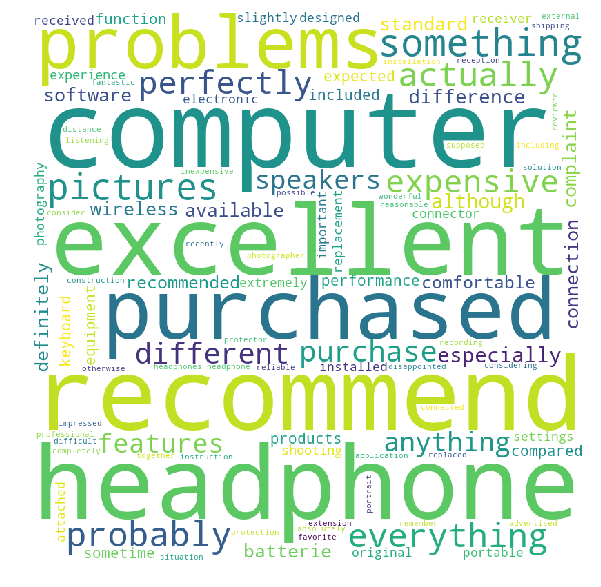

In [185]:
from nltk.corpus import stopwords
stopwords_ = set(stopwords.words('english'))


comment_words = ' '
for val in p_comments: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords_,
                max_words = 100,      
                min_word_length=8,
                min_font_size=5).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

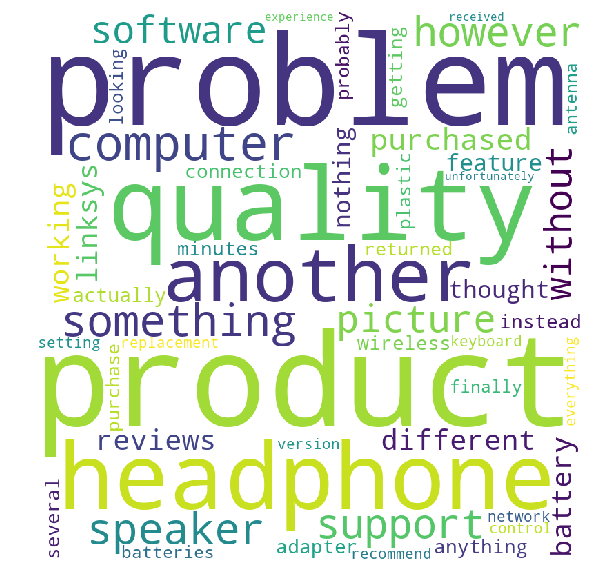

In [187]:
comment_words = ' '
for val in N_comments: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords_,
                max_words = 50,      
                min_word_length=7,
                min_font_size=10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [188]:
from nltk.corpus import wordnet

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

def clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)


In [189]:
data_test=data.iloc[:100,:]

In [196]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_treebank_pos_tagger')

[nltk_data] Downloading package stopwords to /Users/nivzz/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/nivzz/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/nivzz/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_treebank_pos_tagger to
[nltk_data]     /Users/nivzz/nltk_data...
[nltk_data]   Package maxent_treebank_pos_tagger is already up-to-
[nltk_data]       date!


True

In [197]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/nivzz/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [206]:
# clean text data
data["review_clean"] = data["reviewText"].apply(lambda x: clean_text(x))

In [207]:
testdoc=data['review_clean']
testydoc=data['Sentiment']

Xtrain,xtest,ytrain,ytest=train_test_split(testdoc,testydoc)

In [208]:
#testing LR with clean data
model_LR=Pipeline([('vect',TfidfVectorizer()),
                ('rfcl',LogisticRegression(C=3))])
model_LR.fit(Xtrain,ytrain)
predicttest=model_LR.predict(xtest)
print('For model'+ str(model_LR)+ 'Accuracy achieved is'+str(accuracy_score(ytest,predicttest)))
print('Classification report:'+ str(metrics.classification_report(ytest,predicttest)))

For modelPipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
...penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])Accuracy achieved is0.853
Classification report:              precision    recall  f1-score   support

    Negative       0.71      0.53      0.61      2898
     Neutral       0.35      0.06      0.10      1963
    Positive       0.87      0.98      0.92     20139

   micro avg       0.85      0.85      0.85     25000
   macro avg       0.64      0.52      0.54     25000
weighted avg       0.81      0.85      0.82     25000



In [214]:
y_train.value_counts()

Positive    64553
Negative     9061
Neutral      6386
Name: Sentiment, dtype: int64

In [215]:
import imblearn


ImportError: cannot import name 'MultiOutputMixin' from 'sklearn.base' (/Users/nivzz/anaconda3/lib/python3.7/site-packages/sklearn/base.py)

In [219]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.20.3.
